In [ ]:
import pickle
import numpy as np

with open('final_results.pkl', 'rb') as f:
    final_results = pickle.load(f)

with open('jax_results.pkl', 'rb') as f:
    jax_results = pickle.load(f)

with open('../results.pkl', 'rb') as f:
    results = pickle.load(f)


dict_keys(['X_train_snap', 'X_test_snap', 'X_train_shifted', 'Straight_prediction', 'Aligned_prediction', 'U_pred'])
dict_keys(['interpnet_loss_arr', 'shiftnet_loss_arr'])
dict_keys(['X_train', 'X_test', 'X_pred_org', 'X_pred_shifted', 'X_pred_unshifted'])
(200, 20) (200, 20) (200, 20)


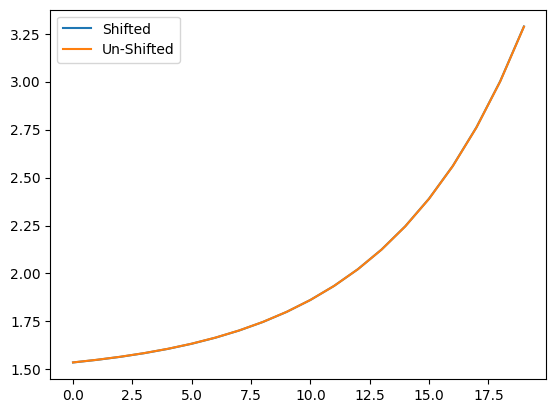

In [ ]:
print(final_results.keys())
print(jax_results.keys())
print(results.keys())

X_pred_shifted = results['X_pred_shifted']
X_pred_unshifted = results['X_pred_unshifted']
X_test =  results['X_test']

print(X_pred_shifted.shape, X_pred_shifted.shape, X_test.shape)

test_pred_errs_shifted, test_pred_errs_unshifted = [], []

for i in range(X_pred_shifted.shape[1]):
    err_val_shifted = np.linalg.norm(X_pred_shifted[:,i] - X_test[:,i])/ np.linalg.norm(X_test[:,i])
    err_val_unshifted = np.linalg.norm(X_pred_unshifted[:,i] - X_test[:,i])/ np.linalg.norm(X_test[:,i])

    test_pred_errs_shifted.append(err_val_shifted)
    test_pred_errs_unshifted.append(err_val_unshifted)


import matplotlib.pyplot as plt
plt.plot(test_pred_errs_shifted, label = 'Shifted')
plt.plot(test_pred_errs_unshifted, label = 'Un-Shifted')
plt.legend()


dict_keys(['X_train_snap', 'X_test_snap', 'X_train_shifted', 'Straight_prediction', 'Aligned_prediction', 'U_pred'])
(1200, 40)


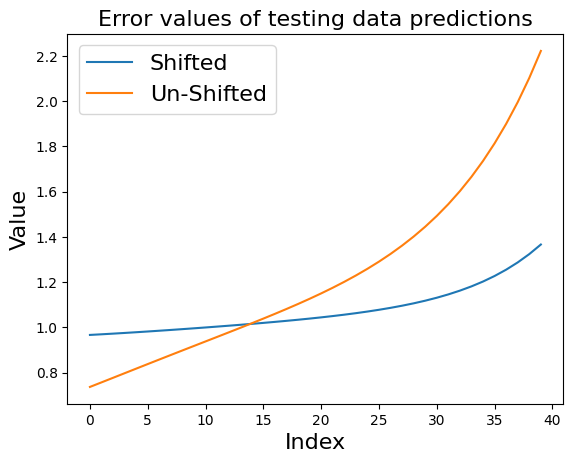

In [ ]:
print(final_results.keys())
# print(jax_results.keys())
# print(results.keys())
X_test_snap = final_results['X_test_snap']
Straight_prediction = final_results['Straight_prediction']
Aligned_prediction = final_results['Aligned_prediction']

# print(X_test_snap.shape, Straight_prediction.shape, Aligned_prediction.shape)
# X_train_snap = final_results['X_train_snap']
# print(X_train_snap.shape)


test_pred_errs_shifted, test_pred_errs_unshifted = [], []

for i in range(X_test_snap.shape[1]):
    err_val_unshifted = np.linalg.norm(Straight_prediction[:,i] - X_test_snap[:,i])/ np.linalg.norm(X_test_snap[:,i])
    err_val_shifted = np.linalg.norm(Aligned_prediction[:,i] - X_test_snap[:,i])/ np.linalg.norm(X_test_snap[:,i])

    test_pred_errs_shifted.append(err_val_shifted)
    test_pred_errs_unshifted.append(err_val_unshifted)


import matplotlib.pyplot as plt
plt.plot(test_pred_errs_shifted, label = 'Shifted')
plt.plot(test_pred_errs_unshifted, label = 'Un-Shifted')
plt.legend(fontsize = 16)
plt.xlabel('Index', fontsize = 16)
plt.ylabel('Value', fontsize = 16)
plt.title('Error values of testing data predictions', fontsize = 16)
    
U_pred = final_results['U_pred']
print(U_pred.shape)
